# Sliding Mode Control for Nonlinear Dynamical Systems II
This notebook demonstrates Sliding Mode Control as described in https://en.wikipedia.org/wiki/Sliding_mode_control with the mathematical pendulum system. The aim is to drive an offset trajectory represented by a variational vector to a nominal trajectory through controling the variational equations.

In [1]:
# numpy is a covenient library for fast numerical computation
import numpy as np
# scipy contains an ordinary differential equation (ODE) solver
from scipy.integrate import solve_ivp
# visualization library
import matplotlib.pyplot as plt

In [2]:
# ddx + k sin(x) = 0

In [3]:
# pendulum equations of motion + variational equations
def pendulum_veq(t, z, k, cntr, u):
    
    x,eta,vx,veta = z
    
    # equations of motion
    dx = vx  
    dvx = -k * np.sin(x-np.pi)
 
    # variational equations
    deta = veta
    dveta = -k * np.cos(x)*eta + cntr*u(eta,deta,k) 
    
    return [dx,deta,dvx,dveta]

In [4]:
# sliding mode controller

def u(x,dx,k):
    
    res = - (np.abs(dx)+k+1)*np.sign(x+dx)
    return res

In [5]:
# define initial conditions, i.e. state vector z=[x,eta,dx,deta] at time t=0
z0 = [1.5,0.1,1.5,0.1]

# define constants
k = 1

# controls on (1) / off (0)
cntr = 1

In [6]:
# solve the ODE / initial value problem for a set of parameter values
sol0 = solve_ivp(pendulum_veq, [0, 20], z0, args=[k, cntr, u],
                dense_output=True)


In [13]:
# table the solution against time
t = np.linspace(0, 20, 3000)
z = sol0.sol(t)

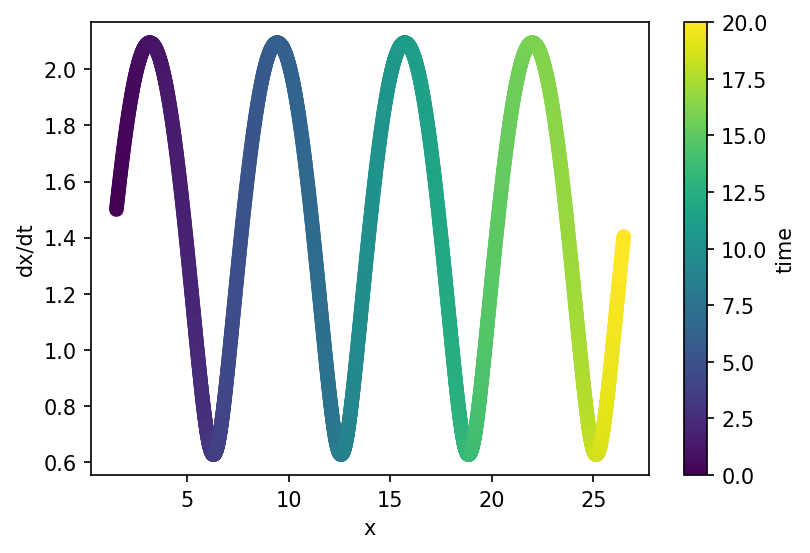

In [14]:
# plot the unperturbed system evolution
plt.figure(dpi=150)
plt.scatter(z[0,:],z[2,:],c=t)
plt.xlabel('x')
plt.ylabel('dx/dt')
cbar = plt.colorbar()
cbar.set_label('time')
plt.show()

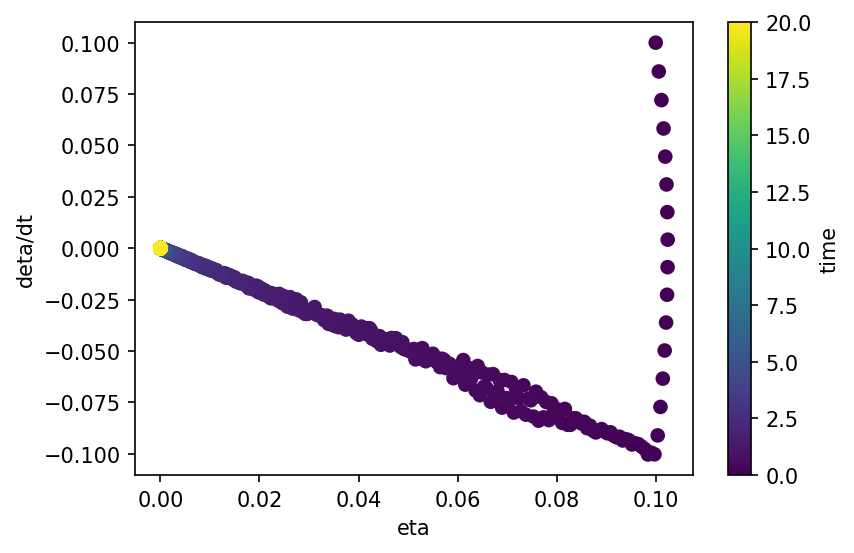

In [16]:
# plot the variational state (=offset trajectory) in phase space as function of time (color)
plt.figure(dpi=150)
plt.scatter(z[1,:],z[3,:],c=t)
plt.xlabel('eta')
plt.ylabel('deta/dt')
cbar = plt.colorbar()
cbar.set_label('time')
plt.show()